### Load Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [20]:
train=pd.read_csv('loan-train.csv')
test= pd.read_csv('loan-test.csv')
train.shape

(614, 13)

In [21]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### 
    We can see that dataset have missing values. Let's see which feature have missing values

<AxesSubplot:>

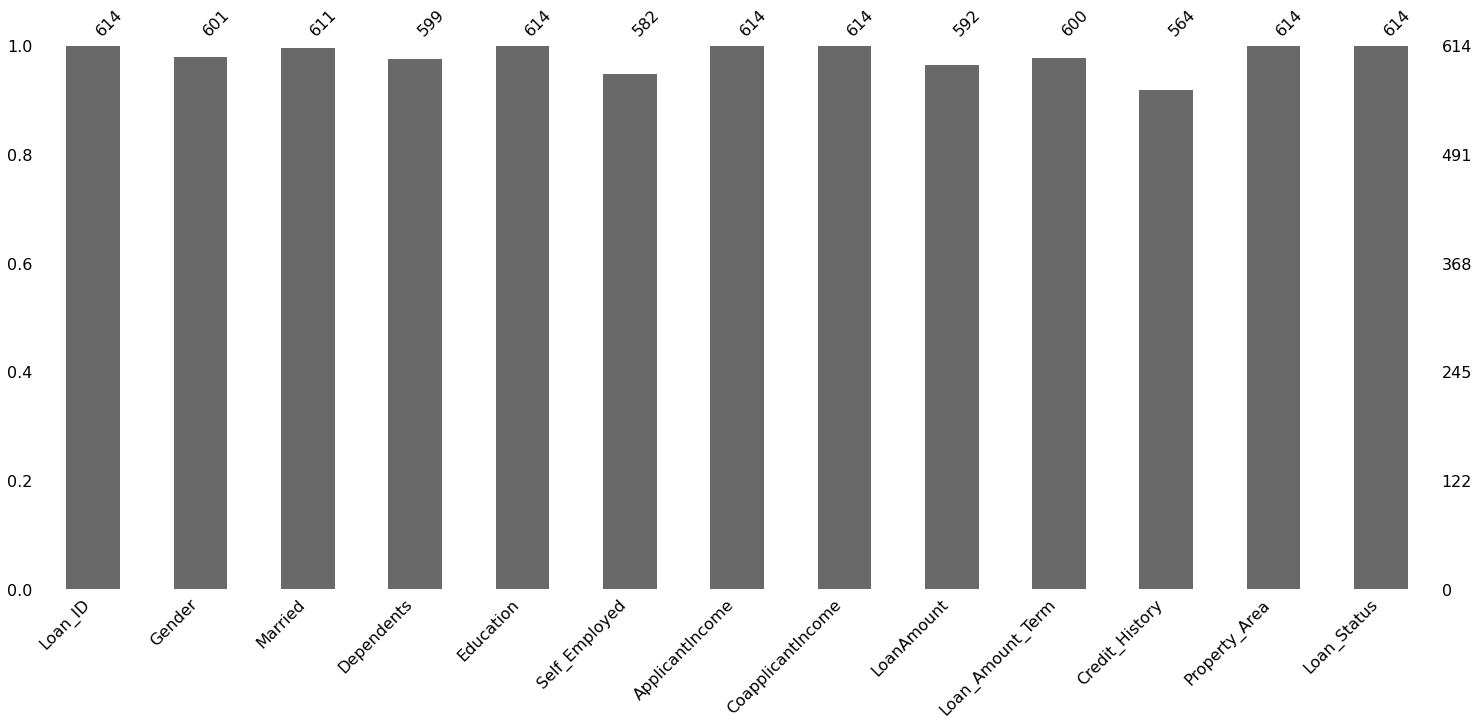

In [22]:
msno.bar(train)

### Filling missing values

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace= True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace= True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

train['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mean(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(), inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode(), inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) 
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

<AxesSubplot:>

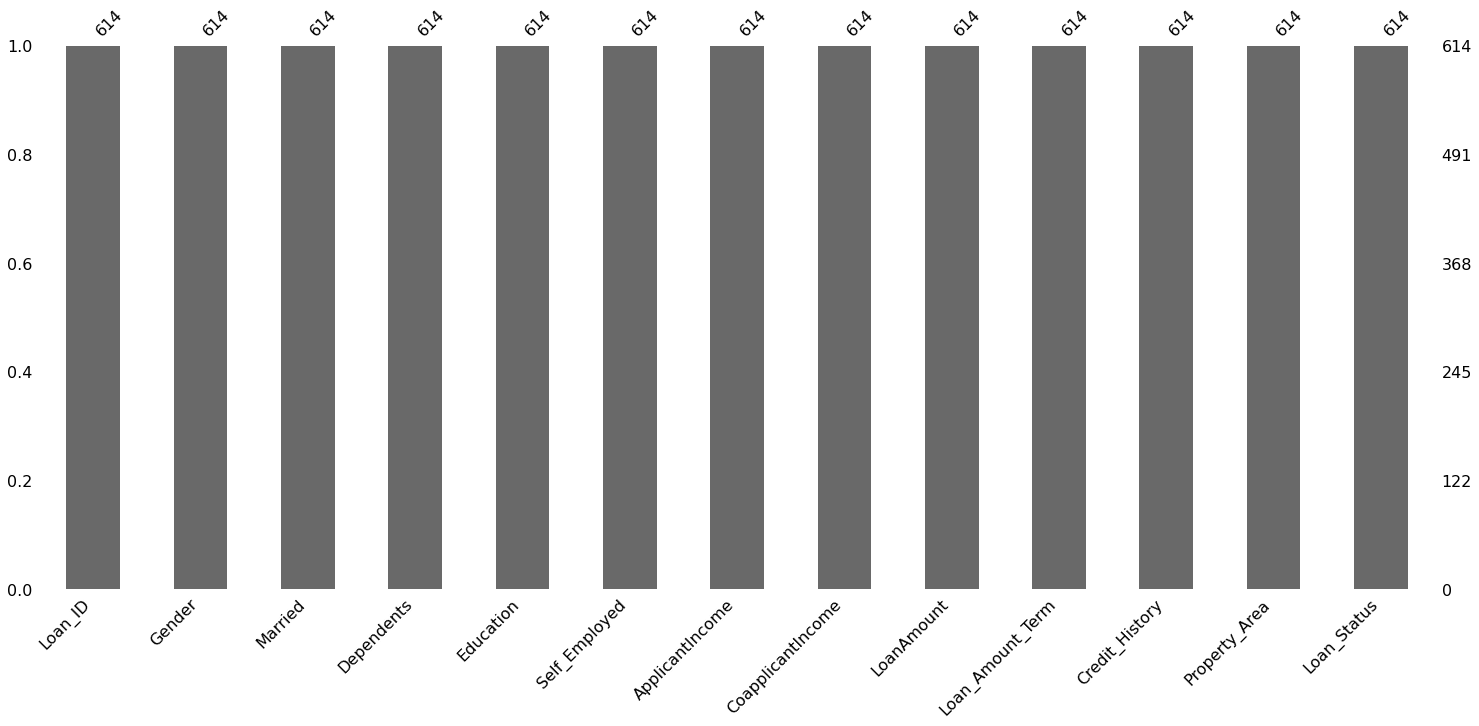

In [29]:
msno.bar(train)

### EDA

<AxesSubplot:>

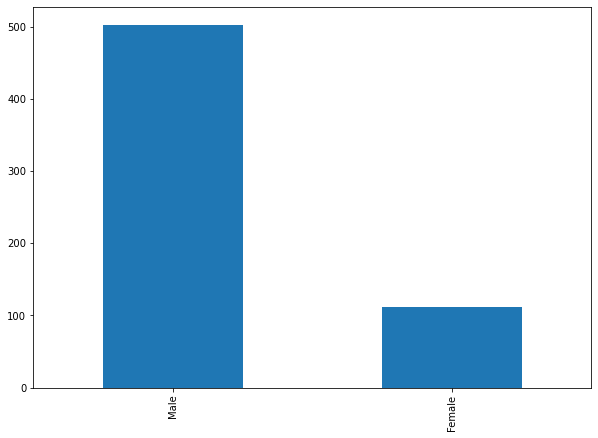

In [31]:
plt.figure(figsize= (10,7))
train['Gender'].value_counts().plot(kind= 'bar')

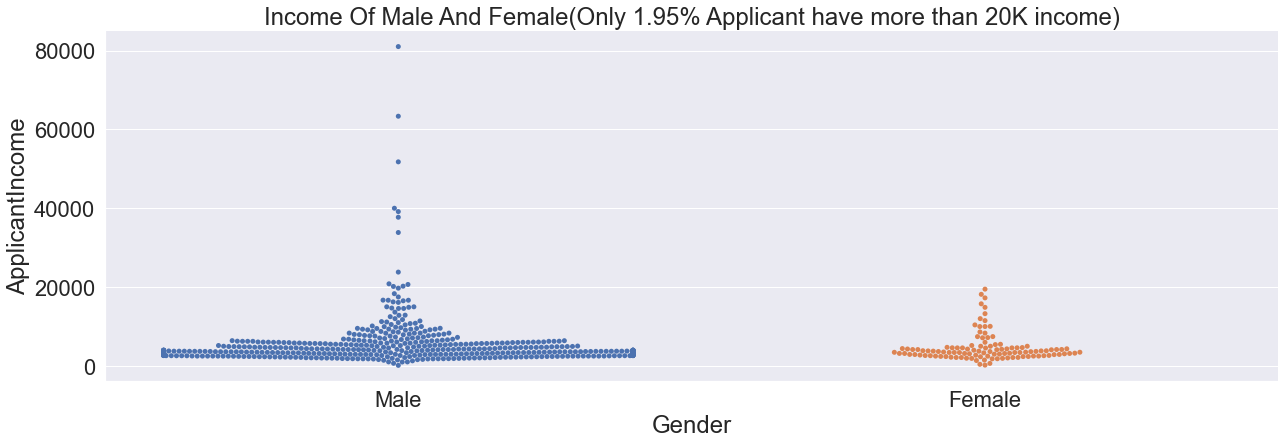

In [39]:
sns.set(font_scale=2)
income= len(train.loc[train['ApplicantIncome']>20000])
a= income*100/614
#print(a)
sns.catplot(data= train, x= 'Gender', y='ApplicantIncome', kind='swarm',
            height=6, aspect=3).set(title= 'Income Of Male And Female(Only 1.95% Applicant have more than 20K income)')

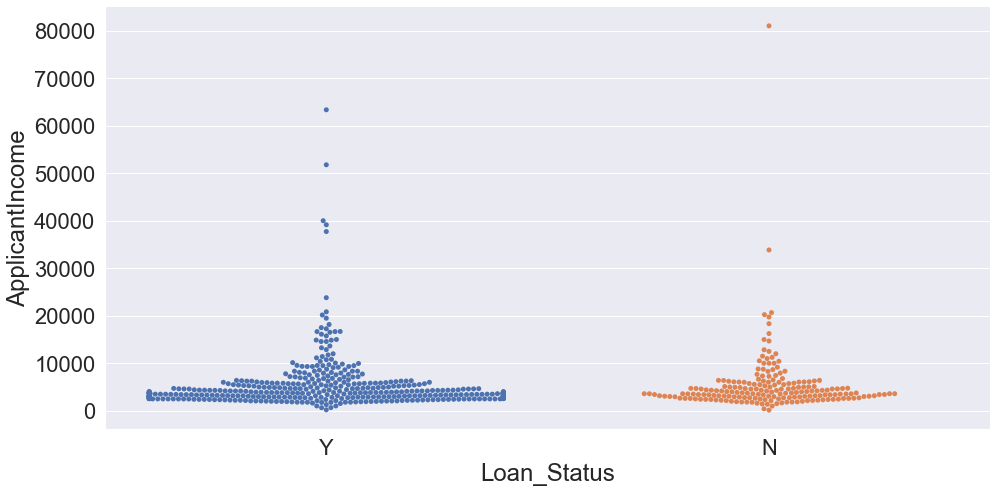

In [43]:
sns.catplot(data= train, x='Loan_Status', y= 'ApplicantIncome', kind= 'swarm', height=7, aspect=2)

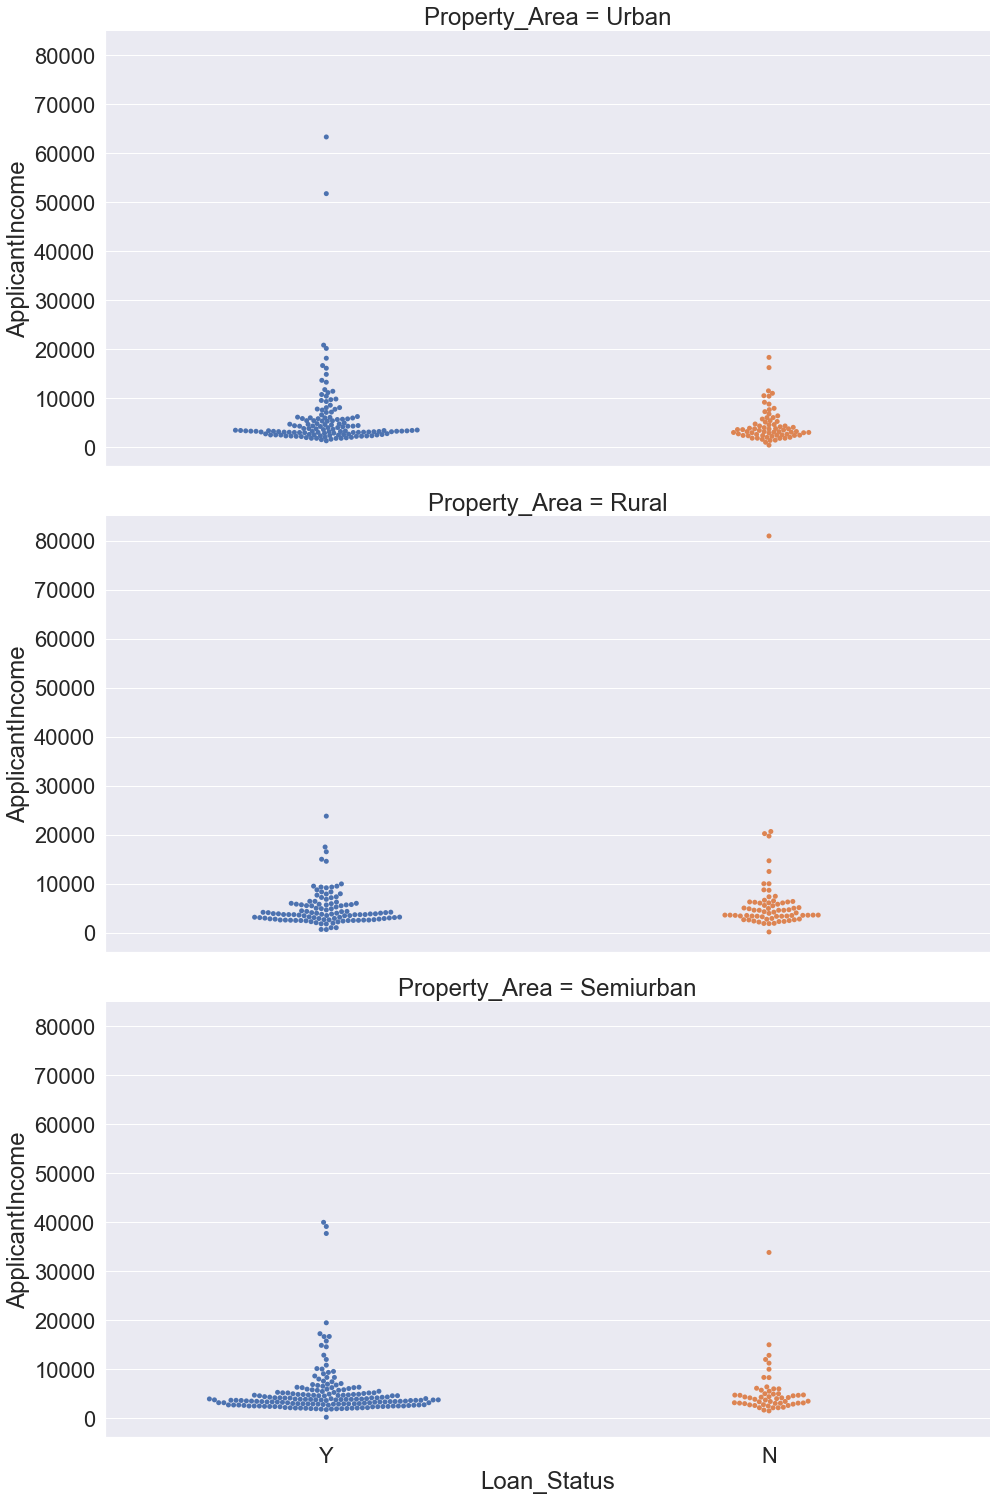

In [47]:
sns.catplot(data= train, x='Loan_Status', y= 'ApplicantIncome',
            kind= 'swarm', row= 'Property_Area', height=7, aspect=2)

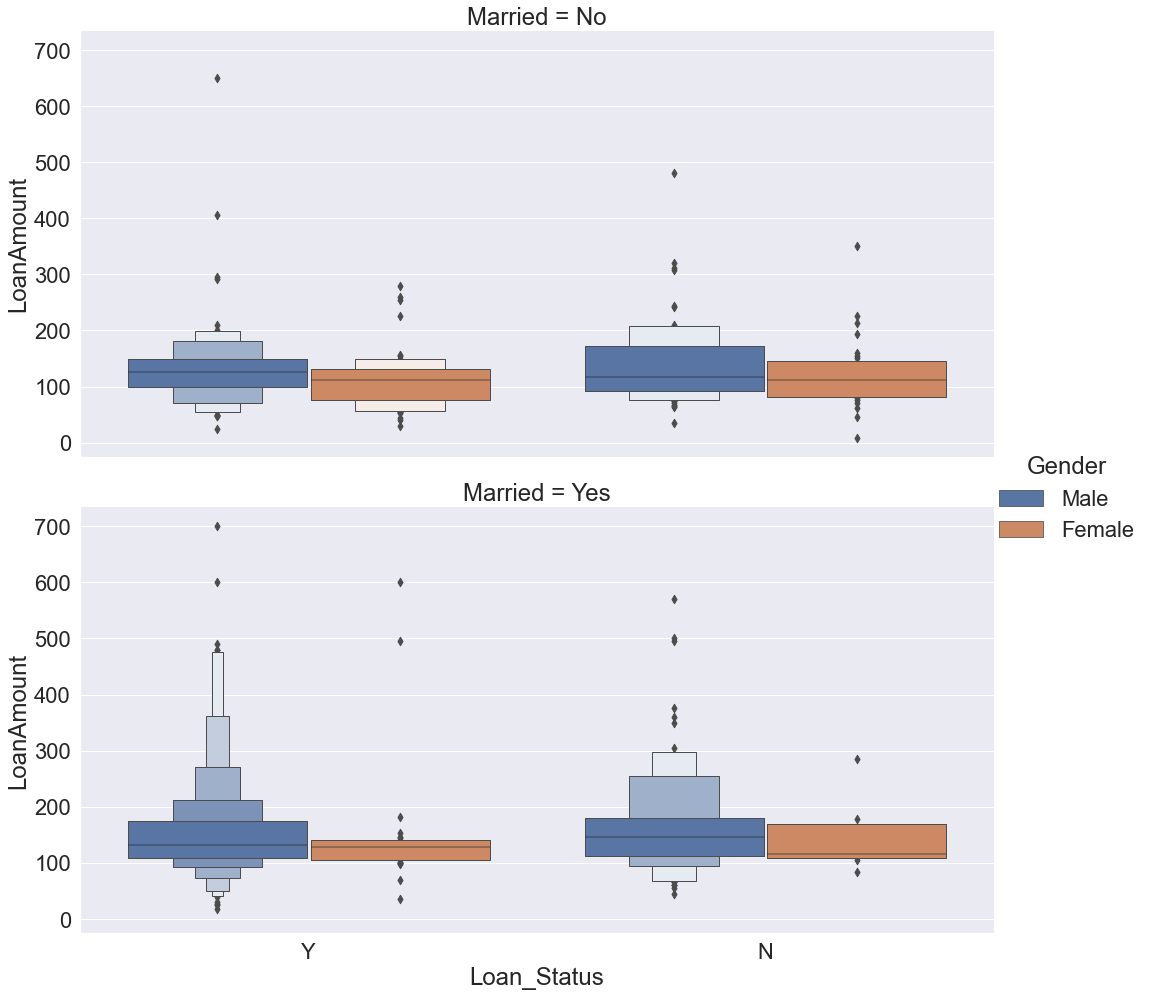

In [52]:
sns.catplot(data= train, x='Loan_Status', y= 'LoanAmount', kind= 'boxen', hue= 'Gender', row='Married', height=7, aspect=2)


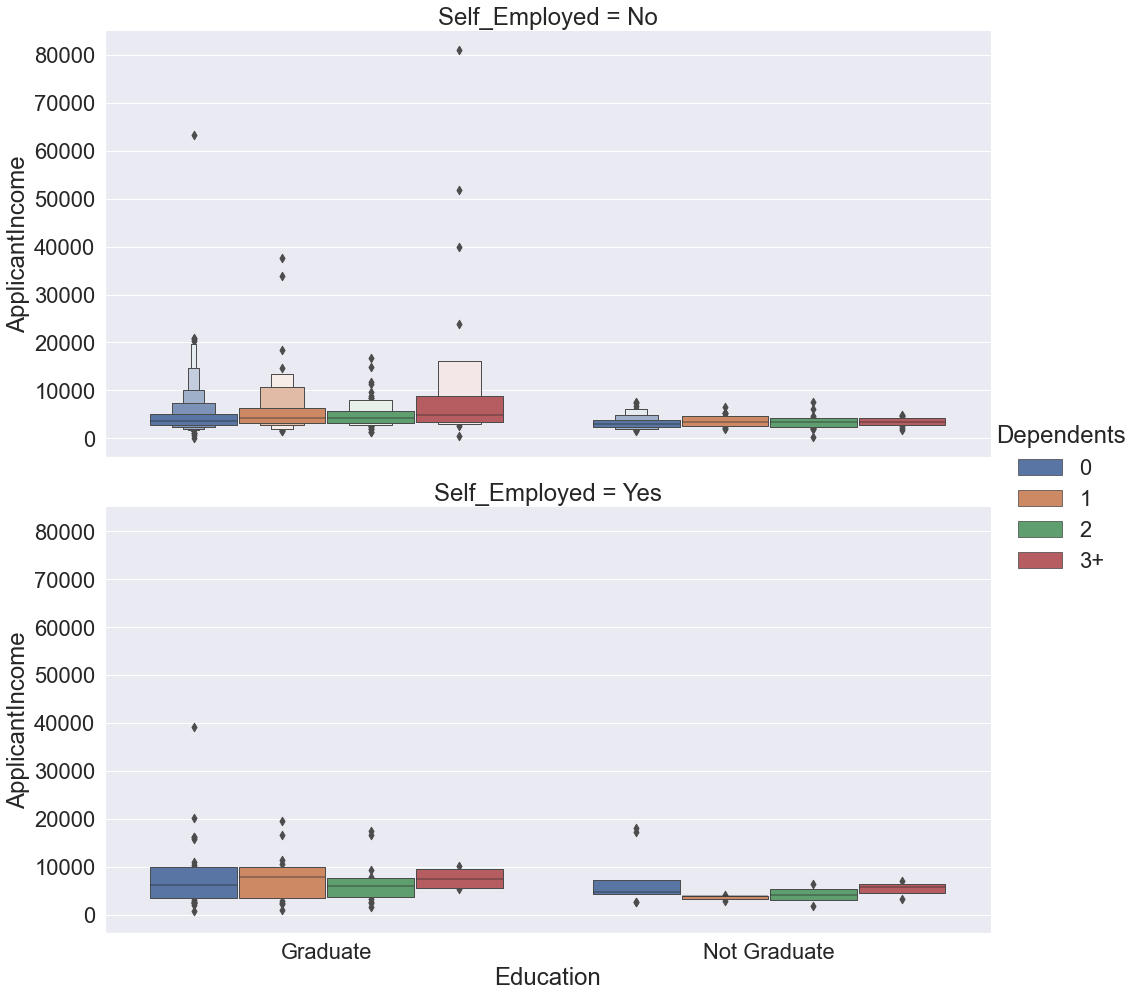

In [56]:
sns.catplot(data= train, x= 'Education', y= 'ApplicantIncome', hue= 'Dependents', row= 'Self_Employed',
           height=7, aspect=2, kind= 'boxen')

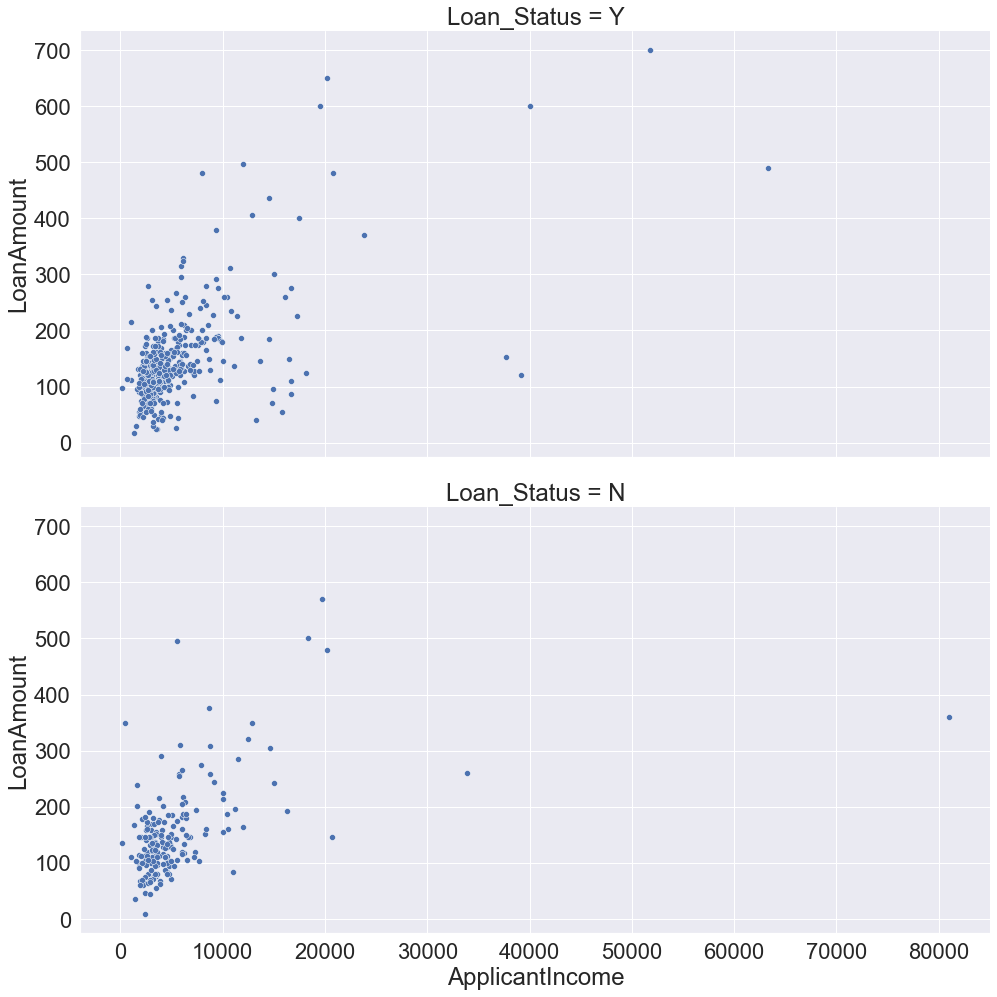

In [59]:
sns.relplot(data= train, x='ApplicantIncome', y='LoanAmount', row= 'Loan_Status', height=7, aspect=2)

<AxesSubplot:>

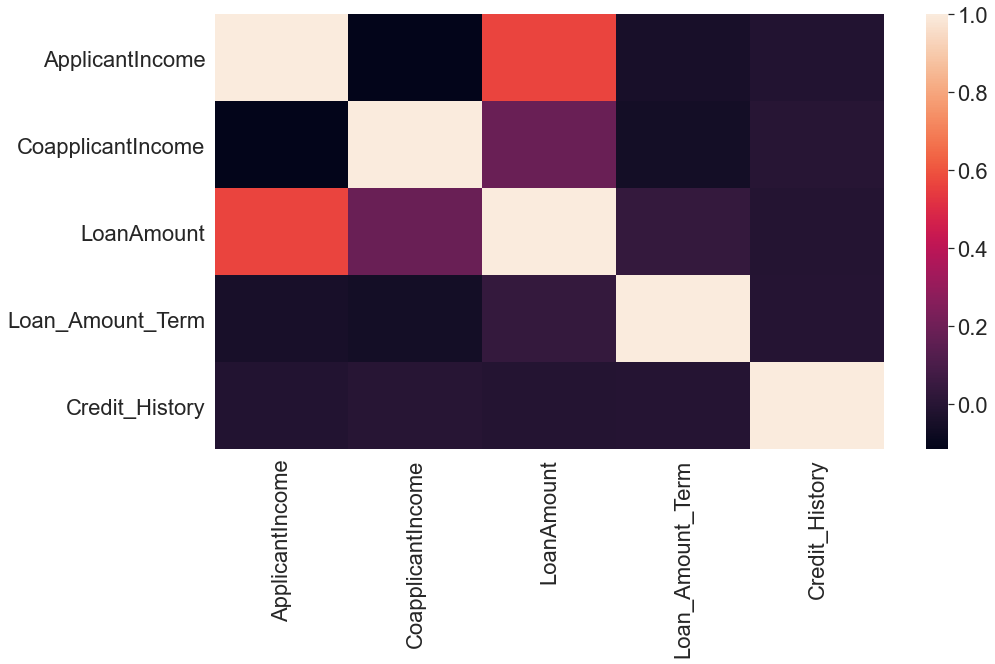

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr())

### Replacing Categorical String with Categorical Integer

In [64]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
test.Gender = test.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.Married.replace({"Yes": 1, "No" : 0})
test.Married = test.Married.replace({"Yes": 1, "No" : 0})

train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})
test.Self_Employed = test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [65]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

### Feature Importance

<AxesSubplot:>

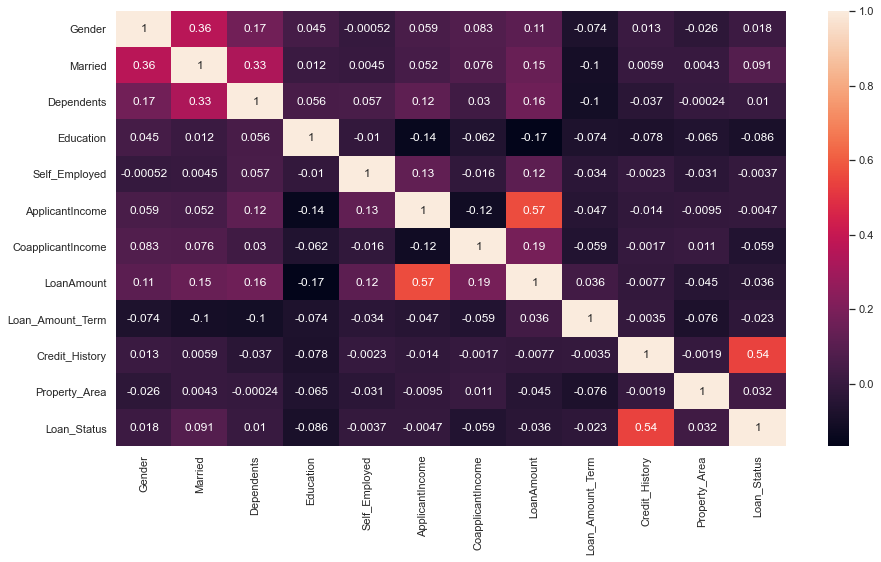

In [68]:
plt.figure(figsize= (15,8))
sns.set(font_scale=1)
sns.heatmap(train.corr(), annot= True)


In [69]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [79]:
#test.drop('Loan_ID', axis=1, inplace= True)

In [70]:
#train.drop('Loan_ID', axis=1, inplace= True)

In [71]:
#label= train.pop('Loan_Status')

In [93]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(train, label)
model.score(train, label)

0.8127035830618893

In [94]:
from sklearn.metrics import confusion_matrix
train_pred= model.predict(train)
test_pred= model.predict(test)
print('Confusion Matrix: \n\n', confusion_matrix(label, train_pred))

Confusion Matrix: 

 [[ 85 107]
 [  8 414]]
